In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plotting, math_functions
from measurements import cwODMR, pulsedODMR
from vectors import vec
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.integrate import quad
from measurements import SnV_ODMR
from hamiltonian import SingleSnVHamiltonian as ssnvh
from scipy.integrate import simps
from scipy.signal import find_peaks, peak_widths
from scipy.optimize import minimize

MW_freq_range = np.linspace(-1e9, 1e9, 1500)  # Frequency range for ODMR sweep
B0 = 0 # Magnetic field strength in Tesla
thetaB, phiB = np.pi, np.pi  # Direction of the magnetic field in spherical coordinates
Linewidth = 50e6  # Linewidth of the transitions (in Hz)
Bvec = vec.getAllframesCartesian(B0, thetaB, phiB)[0]
#
# eigenenergies, eigenstates = ssnvh.SNV_eigenEnergiesStates_T(Bvec,alpha)
# print(ssnvh.gamma_e * (eigenenergies[1] - eigenenergies[0]))
thetaMW, phiMW = np.pi/2, np.pi # Direction of the magnetic field in spherical coordinates
MWvec = vec.getAllframesCartesian(1, thetaMW, phiMW)[0]
# Call the function to calculate the ODMR spectrum
# T = 296

def calculate_line(C,beta,T,Linewidth):
    alpha = C*T**3
    linewidth = Linewidth * (1 - beta * alpha)
    
    return linewidth, alpha

def calculate_fwhm(data, frequency):
    """
    Calculate the Full Width at Half Maximum (FWHM) of peaks in the given data.

    Parameters:
    data (np.ndarray): The ODMR signal data.
    frequency (np.ndarray): The frequency range corresponding to the data.

    Returns:
    fwhms (list): A list of FWHM values for each detected peak in Hz.
    """

    # Find peaks in the data
    peaks, _ = find_peaks(data, height=0)

    # Calculate the full width at half maximum (FWHM) for each peak
    results_half = peak_widths(data, peaks, rel_height=0.5)

    # Convert the width from data points to frequency units
    fwhms = np.diff(frequency)[0] * results_half[0]

    return fwhms.tolist()

def fit(C,beta,T,Linewidth):
    d = []
    for i,t in enu
    data = SnV_ODMR.singleSnVodmr_T(MW_freq_range, MWvec, Bvec, calculate_line(C,beta,T,Linewidth))
    fwhms = calculate_fwhm(data, MW_freq_range)

    return data

initial_guesses = [1e-4, -10]
T_data = 300


linewidth_data = SnV_ODMR.singleSnVodmr_L(MW_freq_range, MWvec, Bvec, Linewidth, T_data)
# Perform curve fitting
popt, pcov = curve_fit(fit, MW_freq_range, linewidth_data, p0=initial_guesses)


# Perform the optimization

C_optimal, beta_optimal = popt



TypeError: fit() missing 1 required positional argument: 'Linewidth'

T difference 86.72696928307515
difference with 0 86.74445460220534



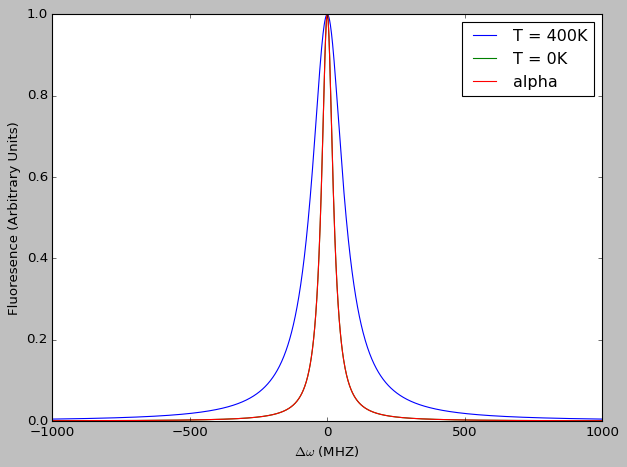

In [31]:
T = 400

data = SnV_ODMR.singleSnVodmr_T(MW_freq_range, MWvec, Bvec, Linewidth, [C_optimal, T],beta_optimal)
fwhm_T = calculate_fwhm(data/max(data), MW_freq_range)

# Calculate Linewidth_ODMR for this T
snV_ODMR_spectrum_T = SnV_ODMR.singleSnVodmr_L(MW_freq_range, MWvec, Bvec, Linewidth, T)
fwhms_Linewidth_ODMR = calculate_fwhm(snV_ODMR_spectrum_T/max(snV_ODMR_spectrum_T), MW_freq_range)
print("T difference",(fwhms_Linewidth_ODMR[-1] - fwhm_T[-1])/1e6)
print("difference with 0",fwhms_Linewidth_ODMR[-1]/1e6 - Linewidth/1e6)
print()






snV_ODMR_spectrum = SnV_ODMR.singleSnVodmr(MW_freq_range, MWvec, Bvec, Linewidth)
# fwhm_T0 = calculate_fwhm(snV_ODMR_spectrum, MW_freq_range)

# # fitting with different C

# data = SnV_ODMR.singleSnVodmr_T(MW_freq_range, MWvec, Bvec, Linewidth,[[result.fun],T])
# fwhm_T = calculate_fwhm(data, MW_freq_range)
# snV_ODMR_spectrum_T = SnV_ODMR.singleSnVodmr_L(MW_freq_range, MWvec, Bvec, Linewidth, T)
# fwhms_Linewidth_ODMR = calculate_fwhm(snV_ODMR_spectrum_T, MW_freq_range)

plt.figure()
plt.style.use("classic")
plt.plot(MW_freq_range / 1e6, snV_ODMR_spectrum_T/max(snV_ODMR_spectrum_T), label=f"T = {T}K")
plt.plot(MW_freq_range / 1e6, snV_ODMR_spectrum/max(snV_ODMR_spectrum), label="T = 0K")
plt.plot(MW_freq_range / 1e6, data/max(data), label="alpha")
plt.xlabel('$\\Delta \\omega$ (MHZ)')
plt.ylabel('Fluoresence (Arbitrary Units)')
plt.legend()
plt.tight_layout()
plt.show()